In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data

In [7]:
df_ls_30 = pd.read_csv(r"/content/drive/MyDrive/amzn_model/df_less_than_30.csv", usecols=['compined_text', 'rating'])
df_gt_30 = pd.read_csv(r"/content/drive/MyDrive/amzn_model/df_greater_than_30.csv", usecols=['compined_text', 'rating'])

In [8]:
print(df_ls_30.shape, df_gt_30.shape)

(600044, 2) (783648, 2)


In [9]:
final_df = pd.concat([df_ls_30, df_gt_30], axis=0)

In [10]:
final_df.head()

,rating,compined_text
0,5.0,great!! i love my case
1,1.0,"sweats, made side buttons go off. not easy to ..."
2,5.0,love it! love it! works great - very strong -...
3,1.0,not happy at all product did not work for me. ...
4,3.0,to soft it was to soft for my liking


In [11]:
final_df = final_df.sample(frac=1, random_state=42)

In [12]:
final_df.head()

,rating,compined_text
374051,5.0,super fast charging! this is the best c-type f...
153167,1.0,not worth it didnt work
114799,1.0,very cheap product would collapse while in use...
38807,5.0,five stars better than any clip
426670,4.0,nice case for the price nice case for the pric...


rating
5.0    563475
1.0    301661
3.0    226934
2.0    163251
4.0    128371
Name: count, dtype: int64

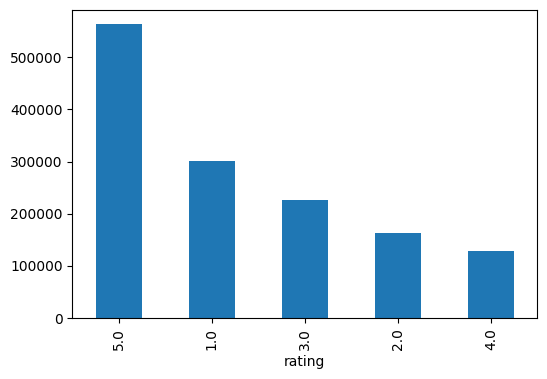

In [14]:
plt.figure(figsize=(6,4), facecolor='white')
final_df.rating.value_counts().plot.bar()
final_df.rating.value_counts()

In [15]:
final_df.shape

(1383692, 2)

In [16]:
df = final_df.sample(frac=.9, random_state=42)

rating
5.0    506996
1.0    271709
3.0    204095
2.0    147033
4.0    115490
Name: count, dtype: int64

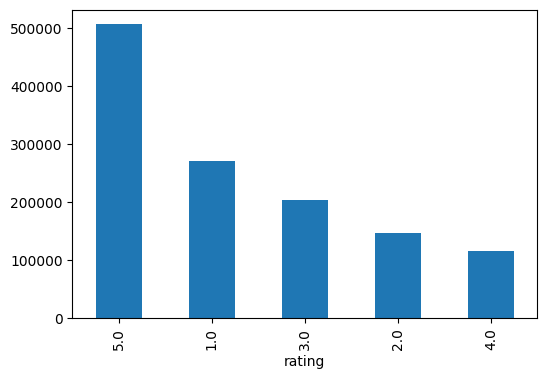

In [18]:
plt.figure(figsize=(6,4), facecolor='white')
df.rating.value_counts().plot.bar()
df.rating.value_counts()

In [20]:
df['label'] = df.rating.apply(lambda x: 1 if x>=4 else 0)

In [21]:
df.to_csv(r"/content/drive/MyDrive/amzn_model/final_df_for_bert.csv", index=False)